# Let's build Linear Regression from Scratch

Imports and Version Checking

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.12.1
Pandas Version: 0.20.3


## The actual class for linear_regression.

In [3]:
import numpy as np

class linear_regression:
    
    def __init__(self, w_intercept=True):
        """
        Performs linear regression using the direct matrix solution
        from linear algebra. Minimizes the sum of squared errors of 
        all included data points by drawing a best fit line and 
        extracting the coefficients of that line.
        ---
        KWargs:
        w_intercept: flag to choose whether to include a y-intercept
        term in the calculation or not.
        """
        self.coef_ = None
        self.intercept = w_intercept
        self.is_fit = False
        
    def add_intercept(self, X):
        """
        Adds an 'all 1's' bias term to function as the y-intercept
        """
        rows = X.shape[0]
        inter = np.ones(rows).reshape(-1,1)
        return np.hstack((X,inter))
        
    def fit(self, X, y):
        """
        Read in X (all features) and y (target) and use the Linear Algebra solution
        to extract the coefficients for Linear Regression.
        """
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)
        
        if self.intercept:
            X = self.add_intercept(X)
            
        temp_xtx = np.linalg.inv(np.dot(X.T,X))
        temp_xty = np.dot(X.T,y)
        self.coef_ = np.dot(temp_xtx,temp_xty)
        self.is_fit = True
    
    def predict(self, X):
        """
        Takes in a new X value (that must be the same shape as the original X for fitting)
        and returns the predicted y value, using the coefficients from fitting.
        """
        if not self.is_fit:
            raise ValueError("You have to run the 'fit' method before using predict!")

        X = self.convert_to_array(X)
        if self.intercept:
            X = self.add_intercept(X)
        return np.dot(X,self.coef_)
   
    def pandas_to_numpy(self, x):
        """
        Checks if the input is a Dataframe or series, converts to numpy matrix for
        calculation purposes.
        ---
        Input: X (array, dataframe, or series)
        Output: X (array)
        """
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.as_matrix()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 
    
    def handle_1d_data(self,x):
        """
        Converts 1 dimensional data into a series of rows with 1 columns
        instead of 1 row with many columns.
        """
        if x.ndim == 1:
            x = x.reshape(-1,1)
        return x
    
    def convert_to_array(self, x):
        """
        Takes in an input and converts it to a numpy array
        and then checks if it needs to be reshaped for us
        to use it properly
        """
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x

    def score(self, X, y):
        """
        Uses the predict method to measure the (negative)
        mean squared error of the model.
        ---
        In: X (list or array), feature matrix; y (list or array) labels
        Out: negative mean squared error (float)
        """
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)
        pred = self.predict(X)
        return -1.* np.mean((np.array(pred)-np.array(y))**2)

In [4]:
def gen_data(coef=3.5, intercept=5., num_points=100):
    X = np.random.uniform(0,10,num_points)
    y = coef*X + np.random.normal(0,1.5,100) + intercept
    return X,y

X,y = gen_data()
lr = linear_regression(w_intercept=True)
lr.fit(X,y)
lr.coef_

array([[ 3.54812064],
       [ 4.90413738]])

In [5]:
lr.predict([0.5])

array([[ 6.6781977]])

In [6]:
to_predict = np.linspace(0,10,100)
model_vals = lr.predict(to_predict)

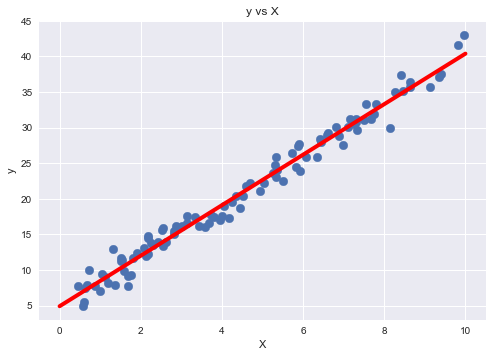

In [7]:
plt.scatter(X,y,s=75)
plt.plot(np.linspace(0,10,100),model_vals,'r-',lw=4)
plt.xlabel('X')
plt.ylabel('y')
plt.title("y vs X");

In [8]:
X_test, y_test = gen_data()
lr.score(X_test, y_test)

-1.8020555944694752

## Let's see it in action with X^2

In [13]:
X = np.linspace(0,10,100)
y = 2.5*X*X + np.random.normal(0,1.5,100) + 5.

lr = linear_regression(w_intercept=True)
lr.fit(X*X,y)
lr.coef_

array([[ 2.49971206],
       [ 5.14115013]])

In [15]:
lr.predict([0])

array([[ 5.14115013]])

In [16]:
to_predict = np.linspace(0,10,100)
model_vals = lr.predict(to_predict*to_predict)


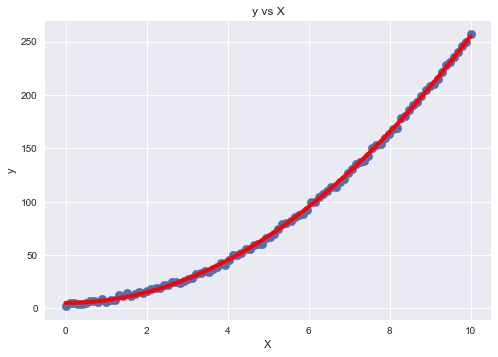

In [17]:
plt.scatter(X,y,s=75)
plt.plot(np.linspace(0,10,100),model_vals,'r-',lw=4)
plt.xlabel('X')
plt.ylabel('y')
plt.title("y vs X");

## Check Error handling for fit-predict

In [18]:
linear_regression = linear_regression()
linear_regression.predict([1])

ValueError: You have to run the 'fit' method before using predict!